<a href="https://colab.research.google.com/github/CustomUser47/US-Covid-19-Analysis/blob/master/US_Covid_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas

In [2]:
pip install geopandas==0.3.0

In [3]:
pip install plotly-geo

In [4]:
pip install pyshp==1.2.10

In [5]:
pip install shapely==1.6.3

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [69]:
print('This project deals with Covid 19 Analysis of United States, which has most confirmed/death cases reported.')
print('Data used for the project are gathered from the following data providers:')
print('  Johns Hopkins University & Medicine')
print('  New York Times')
print('  CDC (Centers for Disease Control and Prevention)')
print('  Harvard Global Health Institute')
print('  Data SF')
print('  data.gov')

This project deals with Covid 19 Analysis of United States, which has most confirmed/death cases reported.
Data used for the project are gathered from the following data providers:
  Johns Hopkins University & Medicine
  New York Times
  CDC (Centers for Disease Control and Prevention)
  Harvard Global Health Institute
  Data SF
  data.gov


In [55]:
global_recovery = pd.read_csv('recovered_global.csv')
us_recovery = global_recovery[global_recovery['Country/Region'] == 'US']
us_recovery.drop(['Lat','Long','Province/State','Country/Region'], inplace = True, axis =1)
recovery = us_recovery.T
recovery.rename({225:'Recovered'}, inplace = True, axis =1)

recovery.set_index(keys = np.arange(len(recovery)),drop = True,inplace = True)

In [57]:
global_confirmed = pd.read_csv('confirmed_global.csv')
us_confirmed = global_confirmed[global_confirmed['Country/Region'] == 'US']
us_confirmed.drop(['Lat','Long','Province/State','Country/Region'], inplace = True, axis =1)
confirmed = us_confirmed.T
confirmed.rename({225:'Confirmed'}, inplace = True, axis =1)

confirmed.set_index(np.arange(len(confirmed)),drop = True,inplace = True)

In [56]:
global_death = pd.read_csv('global_deaths.csv')
us_deaths = global_death[global_death['Country/Region'] == 'US']
us_deaths.drop(['Lat','Long','Province/State','Country/Region'], inplace = True, axis =1)
deaths = us_deaths.T
deaths.rename({225:'Deaths'}, inplace = True, axis =1)
deaths.set_index(np.arange(len(deaths)),drop = True,inplace = True)


In [61]:
result = pd.concat([confirmed,recovery,deaths], axis=1, join='inner')
x_variable = np.arange(len(result))

#For graph plotting

result['Active'] = result['Confirmed'] - (result['Recovered'] + result['Deaths'])
result['Daily Confirmed'] = result['Confirmed'].diff().fillna(result['Confirmed'])
result['Daily Recovered'] = result['Recovered'].diff().fillna(result['Recovered'])
result['Daily Deaths'] = result['Deaths'].diff().fillna(result['Deaths'])


recovery_rate = (result['Recovered'].iloc[-1]/result['Confirmed'].iloc[-1])*100
mortality_rate = (result['Deaths'].iloc[-1]/result['Confirmed'].iloc[-1])*100


In [63]:
print("Basic informations")
print("==================")
print()
print('Following numbers and datas are exclusivesly based on United States.')
print('Datas of no other country have been used in this project.')
print('Total number of confirmed cases:',result['Confirmed'].iloc[-1])
print('Total number of recovered cases:',result['Recovered'].iloc[-1])
print('Total number of deaths:',result['Deaths'].iloc[-1])
print("The current recovery rate is:",str(round(recovery_rate,2))+'%')
print("The current mortality rate is:",str(round(mortality_rate,2))+'%')
print('Average cases per day:',round(result['Confirmed'].iloc[-1]/len(result),2))
print('Average recovery per day:',round(result['Recovered'].iloc[-1]/len(result),2))
print('Average deaths per day:',round(result['Deaths'].iloc[-1]/len(result),2))
print('Average cases per hour:',round(result['Confirmed'].iloc[-1]/(len(result)*24),2))
print('Average recovery per hour:',round(result['Recovered'].iloc[-1]/(len(result)*24),2))
print('Average deaths per hour:',round(result['Deaths'].iloc[-1]/(len(result)*24),2))
print('Above results are calculated using data collected from Johns Hopkins Unversity Coronavirus Resource Center.')
print('Graphs below are plotted using data from the same resource.')

Basic informations

Following numbers and datas are exclusivesly based on United States.
Datas of no other country have been used in this project.
Total number of confirmed cases: 3970906
Total number of recovered cases: 1210849
Total number of deaths: 143190
The current recovery rate is: 30.49%
The current mortality rate is: 3.61%
Average cases per day: 21698.94
Average recovery per day: 6616.66
Average deaths per day: 782.46
Average cases per hour: 904.12
Average recovery per hour: 275.69
Average deaths per hour: 32.6
Above results are calculated using data collected from Johns Hopkins Unversity Coronavirus Resource Center.
Graphs below are plotted using data from the same resource.


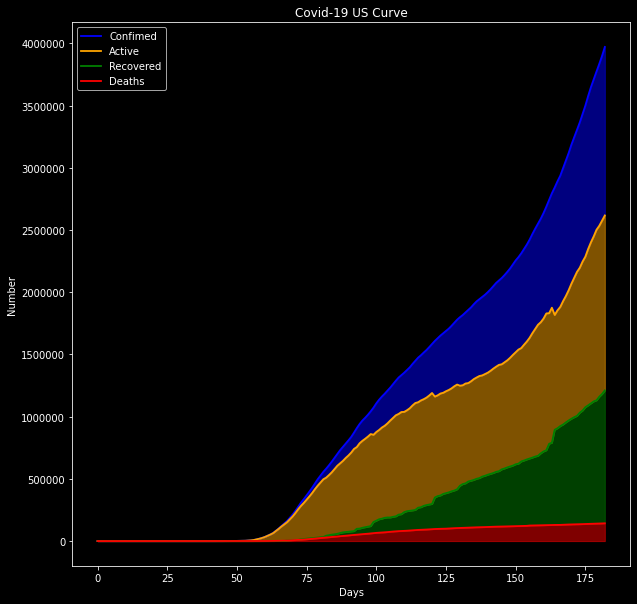

In [64]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(10,10))
  plt.plot(x_variable, result['Confirmed'], color = 'blue', linewidth = 1.8, label = 'Confimed')
  plt.plot(x_variable, result['Active'], color = 'orange', linewidth = 1.8, label = 'Active')
  plt.plot(x_variable, result['Recovered'], color = 'green', linewidth = 1.8, label = 'Recovered')
  plt.plot(x_variable, result['Deaths'], color = 'red', linewidth = 1.8, label = 'Deaths')
  plt.ticklabel_format(style='plain', axis='both', scilimits=(0,0))

  plt.xlabel('Days')
  plt.ylabel('Number')
  plt.title('Covid-19 US Curve')
  plt.legend(loc = 'best')
  
  plt.fill_between(x_variable, result['Confirmed'], result['Active'], color = 'blue', alpha = 0.5)
  plt.fill_between(x_variable, result['Active'],result['Recovered'], color = 'orange', alpha = 0.5)
  plt.fill_between(x_variable, result['Recovered'], result['Deaths'],color = 'green', alpha = 0.5)
  plt.fill_between(x_variable, result['Deaths'], color = 'red', alpha = 0.5)
plt.show()


Weekly changes are marked.



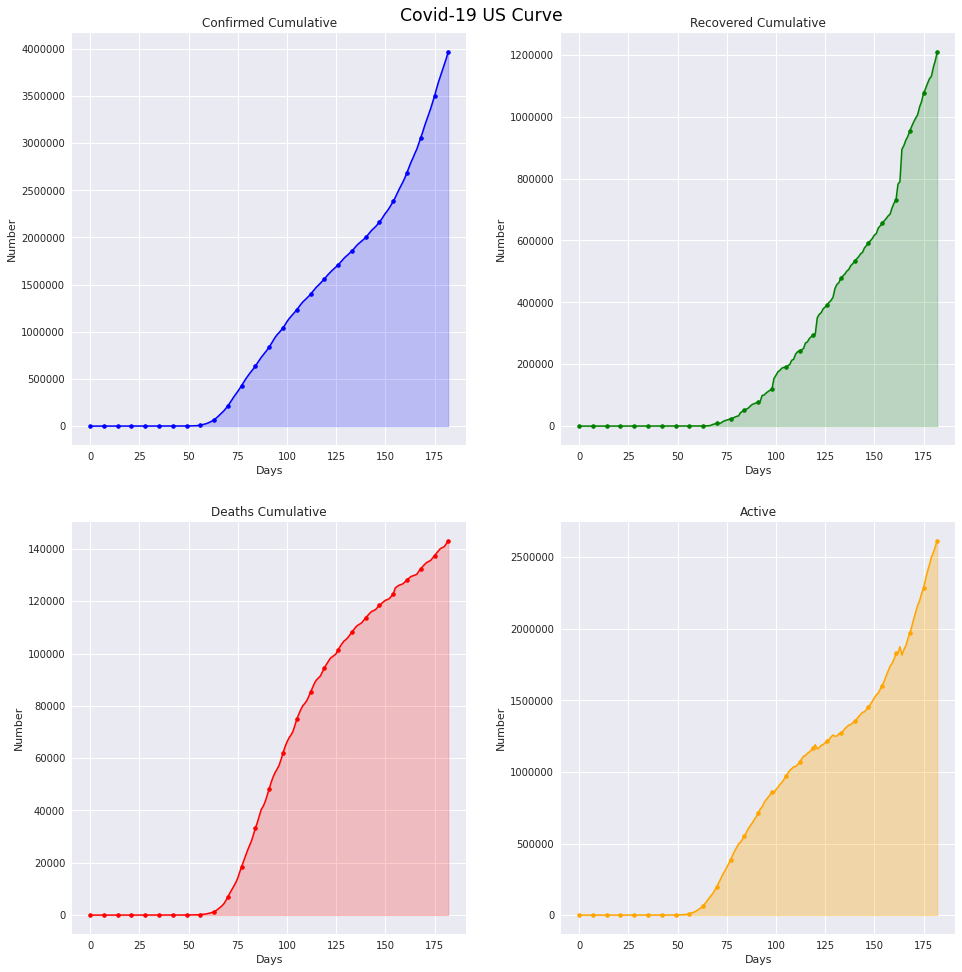

In [66]:
with plt.style.context('seaborn'):
  fig2 = plt.figure(figsize=(14,14))
  subplot1 = fig2.add_subplot(221)
  subplot2 = fig2.add_subplot(222)
  subplot3 = fig2.add_subplot(223)
  subplot4 = fig2.add_subplot(224)

subplot1.plot(x_variable,result['Confirmed'],color = 'blue',marker = '.',ms = 7,markevery = 7)
subplot1.set_xlabel('Days')
subplot1.set_ylabel('Number')
subplot1.set_title('Confirmed Cumulative',fontsize = 'large')
subplot1.fill_between(x_variable,result['Confirmed'], color = 'blue', alpha = 0.2)
subplot1.ticklabel_format(style='plain', axis='both', scilimits=(0,0))

subplot2.plot(x_variable,result['Recovered'],color = 'green',marker = '.',ms = 7,markevery = 7)
subplot2.set_xlabel('Days')
subplot2.set_ylabel('Number')
subplot2.set_title('Recovered Cumulative',fontsize = 'large')
subplot2.fill_between(x_variable,result['Recovered'], color = 'green', alpha = 0.2)
subplot2.ticklabel_format(style='plain', axis='both', scilimits=(0,0))

subplot3.plot(x_variable,result['Deaths'],color = 'red',marker = '.',ms = 7,markevery = 7)
subplot3.set_xlabel('Days')
subplot3.set_ylabel('Number')
subplot3.fill_between(x_variable,result['Deaths'], color = 'red', alpha = 0.2)
subplot3.set_title('Deaths Cumulative',fontsize = 'large')

subplot4.plot(x_variable,result['Active'],color = 'orange',marker = '.',ms = 7,markevery = 7)
subplot4.set_xlabel('Days')
subplot4.set_ylabel('Number')
subplot4.fill_between(x_variable,result['Active'], color = 'orange', alpha = 0.3)
subplot4.set_title('Active',fontsize = 'large')
subplot4.ticklabel_format(style='plain', axis='both', scilimits=(0,0))

fig2.tight_layout(pad=3.0)
fig2.suptitle('Covid-19 US Curve',fontsize = 'xx-large')
print('Weekly changes are marked.')
print()

Weekly changes are marked.



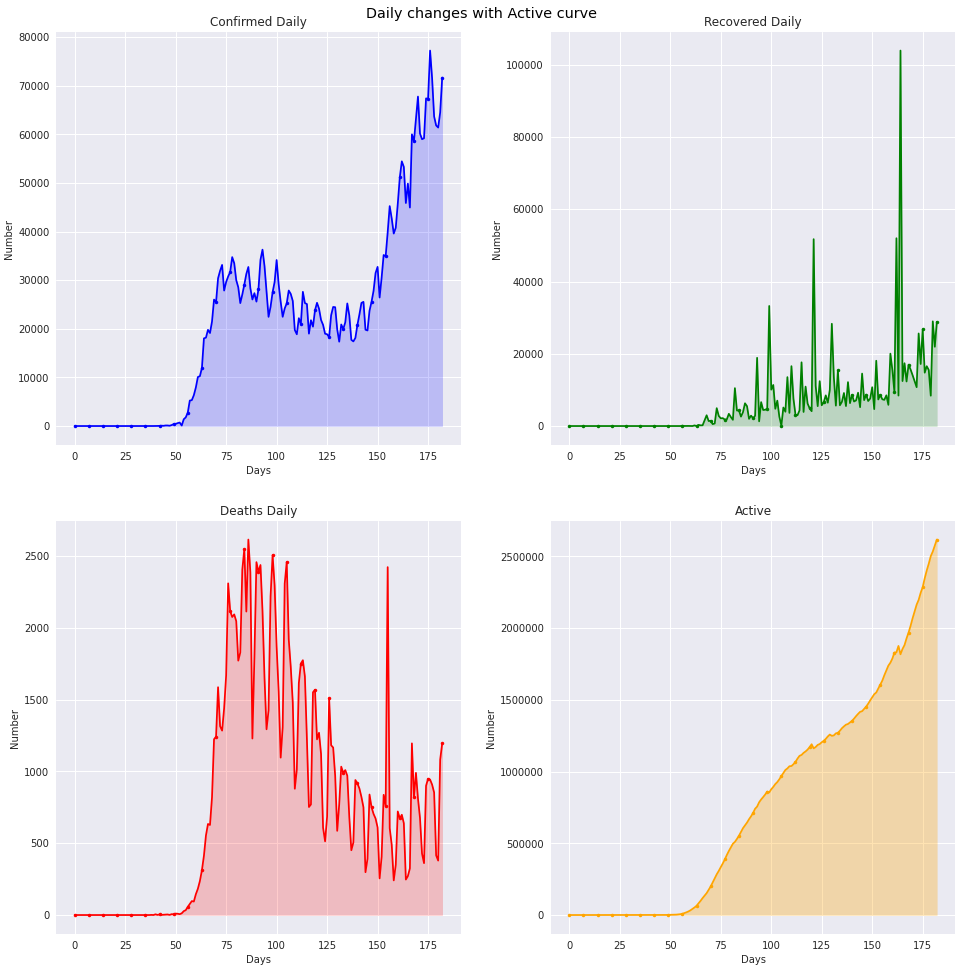

In [67]:
with plt.style.context('seaborn'):
   fig3 = plt.figure(figsize=(14,14))
   sub_plot1 = fig3.add_subplot(221)
   sub_plot2 = fig3.add_subplot(222)
   sub_plot3 = fig3.add_subplot(223)
   sub_plot4 = fig3.add_subplot(224)

   sub_plot1.plot(x_variable,result['Daily Confirmed'],color = 'blue', marker = '.' , markevery = 7, ms = 7)
   sub_plot1.set_xlabel('Days',fontsize = 'medium')
   sub_plot1.set_ylabel('Number',fontsize = 'medium')
   sub_plot1.set_title('Confirmed Daily',fontsize = 'large')
   sub_plot1.fill_between(x_variable,result['Daily Confirmed'], color = 'blue', alpha = 0.2)

   sub_plot2.plot(x_variable,result['Daily Recovered'],color = 'green', marker = '.' , markevery = 7, ms = 7)
   sub_plot2.set_xlabel('Days',fontsize = 'medium')
   sub_plot2.set_ylabel('Number',fontsize = 'medium')
   sub_plot2.set_title('Recovered Daily',fontsize = 'large')
   sub_plot2.fill_between(x_variable,result['Daily Recovered'], color = 'green', alpha = 0.2)

   sub_plot3.plot(x_variable,result['Daily Deaths'],color = 'red', marker = '.' , markevery = 7, ms = 7)
   sub_plot3.set_xlabel('Days',fontsize = 'medium')
   sub_plot3.set_ylabel('Number',fontsize = 'medium')
   sub_plot3.set_title('Deaths Daily',fontsize = 'large')
   sub_plot3.fill_between(x_variable,result['Daily Deaths'], color = 'red', alpha = 0.2)

   sub_plot4.plot(x_variable,result['Active'],color = 'orange', marker = '.' , markevery = 7, ms = 7)
   sub_plot4.ticklabel_format(style='plain', axis='both', scilimits=(0,0))
   sub_plot4.set_xlabel('Days',fontsize = 'medium')
   sub_plot4.set_ylabel('Number',fontsize = 'medium')
   sub_plot4.set_title('Active',fontsize = 'large')
   sub_plot4.fill_between(x_variable,result['Active'], color = 'orange', alpha = 0.3)
   
   fig3.tight_layout(pad=3.0)
   print('Weekly changes are marked.')
   print()
fig3.suptitle('Daily changes with Active curve',fontsize = 'x-large')
plt.show()


  

In [16]:
province_df = pd.read_csv('province.csv')
province_df.drop(province_df[province_df['Lat'].isna()].index, inplace = True)
province_df.drop(province_df[province_df['Confirmed'] == 0].index, inplace = True)

In [17]:
state_df = province_df
state_df.rename(columns = {'Province_State':'State'},inplace = True)
capacity = pd.read_csv('Hospital Capacity.csv')
ca_capacity = capacity[capacity['State'] == 'CA']
capacity['State'] = capacity['State'].replace({'West Virginia ': 'West Virginia'})
capacity['State'] = capacity['State'].replace({'Washington ': 'Washington'})


full_table = state_df.merge(right=capacity, how='left',on=['State'])

full_table = full_table[full_table['Total Hospital Beds'].notna()]

In [18]:
map1 = px.choropleth(full_table,  
                    locations="Code",  
                    color="Confirmed",  
                    hover_name="State", 
                    locationmode = 'USA-states',
                    color_continuous_scale=px.colors.sequential.GnBu) 

map1.update_layout(title_text = 'Confirmed(State wise)', geo_scope='usa',)
map1.show()  


In [68]:
map2 = px.choropleth(full_table,  
                    locations="Code",  
                    color="Deaths",  
                    hover_name="State", 
                    locationmode = 'USA-states',
                    color_continuous_scale=px.colors.sequential.Reds) 
map2.update_layout(title_text = 'Deaths(State wise)',geo_scope='usa',)
map2.show()  

In [20]:
print('Given below are three heatmaps based on correlation between various datas.')
print('Datas used are combined from Harvard Global Health Institute COVID-19 Hospital Capacity Estimates 2020 and Johns Hopkins Unversity Coronavirus Resource Center.')

Given below are three heatmaps based on correlation between various datas.
Datas used are combined from Harvard Global Health Institute COVID-19 Hospital Capacity Estimates 2020 and Johns Hopkins Unversity Coronavirus Resource Center.


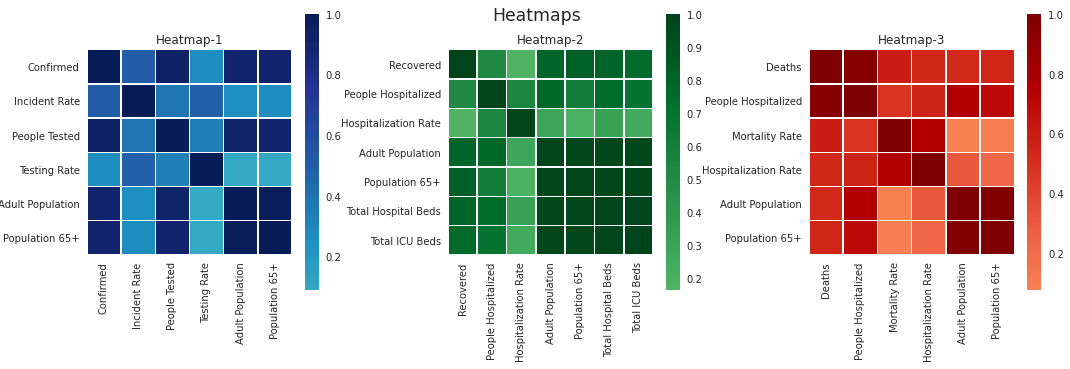

In [21]:
try:
  full_table['Adult Population'] = full_table['Adult Population'].str.replace(',', '').astype(int)
  full_table['Population 65+'] = full_table['Population 65+'].str.replace(',', '').astype(int)
  full_table['Total Hospital Beds'] = full_table['Total Hospital Beds'].str.replace(',', '').astype(int)
  full_table['Total ICU Beds'] = full_table['Total ICU Beds'].str.replace(',', '').astype(int)
except AttributeError:
    pass

#try-except used because first time running the program,the above parameters could be of any data types,but after it is executed once,it becomes type int and throws error next time when it is executed.
#Attribute Error since int has n attribute 'replace'

y1 = ['Confirmed','Incident Rate','People Tested','Testing Rate','Adult Population','Population 65+']
corr1 = full_table[['Confirmed','Incident_Rate','People_Tested','Testing_Rate','Adult Population','Population 65+']].corr()
y2 = ['Recovered','People Hospitalized','Hospitalization Rate','Adult Population','Population 65+','Total Hospital Beds','Total ICU Beds']
corr2 = full_table[['Recovered','People_Hospitalized','Hospitalization_Rate','Total Hospital Beds','Total ICU Beds','Adult Population','Population 65+']].corr()
y3 = ['Deaths','People Hospitalized','Mortality Rate','Hospitalization Rate','Adult Population','Population 65+']
corr3 = full_table[['Deaths','People_Hospitalized','Mortality_Rate','Hospitalization_Rate','Adult Population','Population 65+']].corr()

#y1,y2,y3 for tick labels

with plt.style.context('seaborn'):
  heat = plt.figure(figsize=(15,5))
  
  axes1 = heat.add_subplot(131)
  sns.heatmap(corr1,center = 0,linewidth = 0.5,cmap="YlGnBu",square = True,xticklabels = y1,yticklabels = y1)
  axes1.set_title('Heatmap-1')

  axes2 = heat.add_subplot(132)
  sns.heatmap(corr2,center = 0,linewidth = 0.5,cmap="Greens",square = True,xticklabels = y2,yticklabels = y2)
  axes2.set_title('Heatmap-2')

  axes3 = heat.add_subplot(133)
  sns.heatmap(corr3,center = 0,linewidth = 0.5,cmap="OrRd",square = True,xticklabels = y3,yticklabels = y3)
  axes3.set_title('Heatmap-3')
  
  plt.tight_layout()
  heat.suptitle('Heatmaps',fontsize = 'xx-large')
plt.show()


Given below is a scatter plot with Testing rate on y-axis and Incident rate on x-axis.
Size of each State plotted is associated with it's Mortality rate.



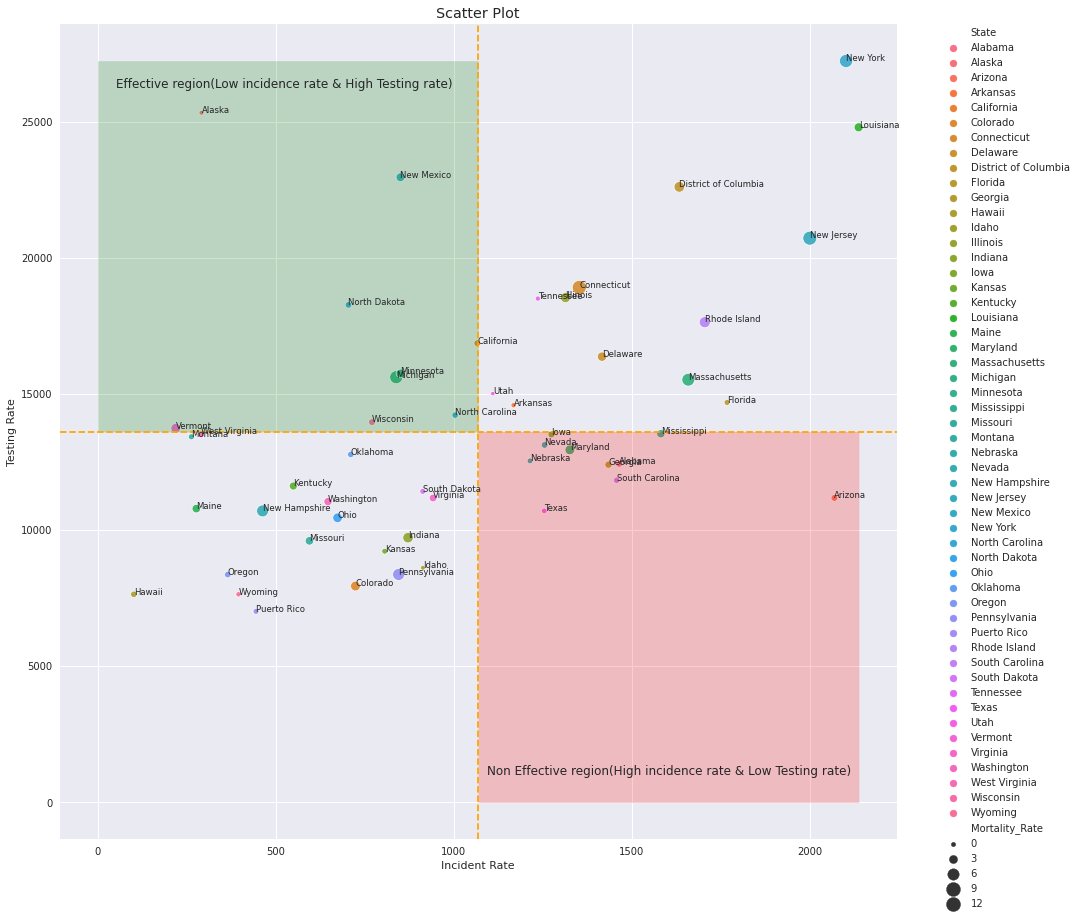

In [22]:

with plt.style.context('seaborn'):
  plt.figure(figsize = (15,15))
  sns.scatterplot(x =full_table['Incident_Rate'],y=full_table["Testing_Rate"],size = full_table['Mortality_Rate'],sizes=(20, 200),hue = full_table['State'],legend = 'brief',alpha = 0.91)

  plt.xlabel('Incident Rate')
  plt.ylabel('Testing Rate')
  plt.title('Scatter Plot',fontsize = 'x-large')

  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)

  plt.axhline(y = full_table["Testing_Rate"].max()/2,color = 'orange',linestyle ="--") 
  plt.axvline(x = full_table['Incident_Rate'].max()/2,color = 'orange',linestyle ="--") 

  x_variable1 = np.arange(full_table['Incident_Rate'].max())
  #x_variable1 for creating sections within scatter plot

  plt.fill_between(x_variable1,0,full_table["Testing_Rate"].max()/2,color = 'red',alpha = 0.2,where = x_variable1 >= full_table["Incident_Rate"].max()/2)
  plt.fill_between(x_variable1,full_table["Testing_Rate"].max()/2,full_table["Testing_Rate"].max(),color = 'green',alpha = 0.2,where = x_variable1 <= full_table["Incident_Rate"].max()/2)
  full_table.reset_index(drop=True, inplace=True)

  for i,text in enumerate(full_table['State']):
      plt.text(full_table['Incident_Rate'][i],full_table["Testing_Rate"][i] , text, fontsize=8.5)
  
  plt.text(50,full_table["Testing_Rate"].max() - 1000,'Effective region(Low incidence rate & High Testing rate)',fontsize = 'large')
  plt.text(full_table["Incident_Rate"].max()/2 + 25,1000,'Non Effective region(High incidence rate & Low Testing rate)',fontsize = 'large')

print('Given below is a scatter plot with Testing rate on y-axis and Incident rate on x-axis.')
print("Size of each State plotted is associated with it's Mortality rate.")
print()
plt.show()


In [23]:
print('Given below is a deeper analysis of state California.')
print('Data used to plot graph below is collected from New York Times series of data files.')

Given below is a deeper analysis of state California.
Data used to plot graph below is collected from New York Times series of data files.


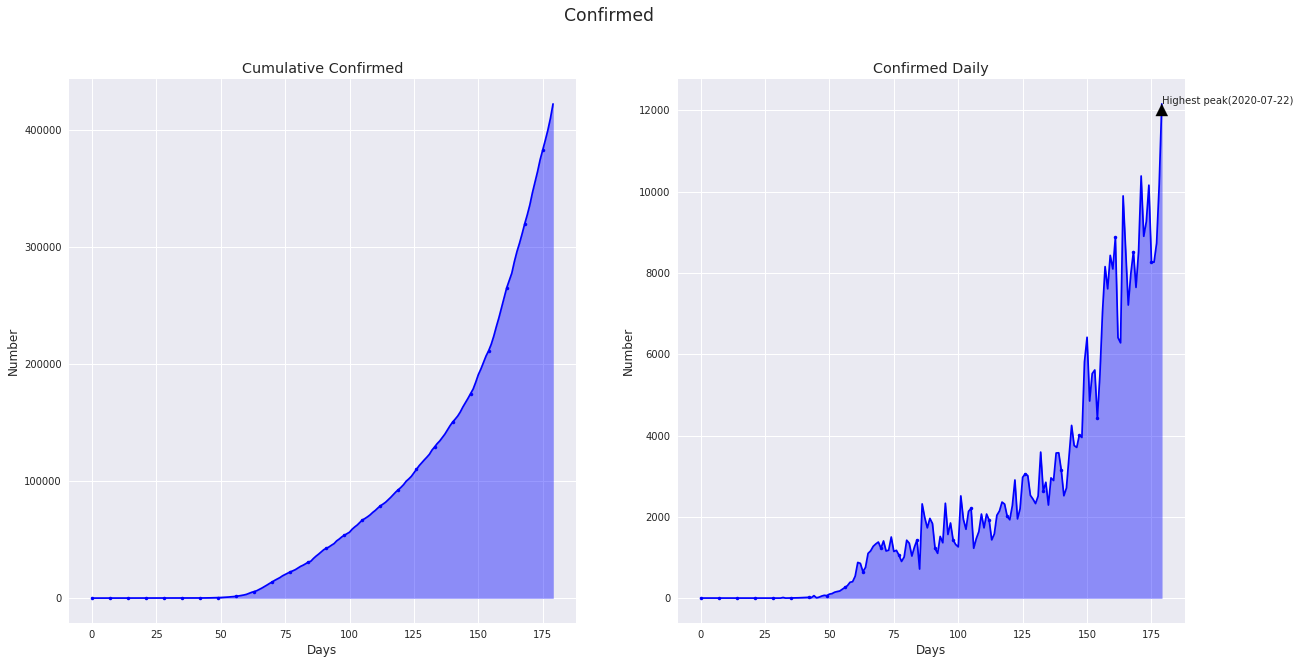

In [24]:
nyt_df = pd.read_csv('statedb.csv')
california = nyt_df[nyt_df['state'] == 'California']
california['Daily Count'] = california['cases'].diff().fillna(california['cases'])
california['Daily Deaths'] = california['deaths'].diff().fillna(california['deaths'])

x_variable2 = np.arange(len(california))
#For plotting graph
california.reset_index(drop=True, inplace=True)

ymax1 = max(california['Daily Count'])
xpos1 = int(california[california['Daily Count'] == ymax1].index[0])
xmax1 = x_variable2[xpos1]
#Used for calculating highest peak

with plt.style.context('seaborn'):
  fig4 = plt.figure(figsize=(20,10))
  plot1 = fig4.add_subplot(121)
  plot2 = fig4.add_subplot(122)

  plot1.plot(x_variable2,california['cases'],marker = '.',markevery= 7,color = 'blue')
  plot1.set_xlabel('Days',fontsize = 'large')
  plot1.set_ylabel('Number',fontsize = 'large')
  plot1.set_title('Cumulative Confirmed',fontsize = 'x-large')
  plot1.fill_between(x_variable2,california['cases'],alpha = 0.4,color = 'blue')

  plot2.annotate('Highest peak(%s)'%california.loc[xpos1,'date'], xy=(xmax1, ymax1), xytext=(xmax1, ymax1-5),arrowprops=dict(facecolor='black', shrink=0.05), )
  plot2.set_xlabel('Days',fontsize = 'large')
  plot2.set_ylabel('Number',fontsize = 'large')
  plot2.set_title('Confirmed Daily',fontsize = 'x-large')
  plot2.plot(x_variable2,california['Daily Count'],marker = '.',markevery = 7,color = 'blue')
  plot2.fill_between(x_variable2,california['Daily Count'],alpha = 0.4,color = 'blue')

  fig4.suptitle('Confirmed',fontsize = 'xx-large')
plt.show()

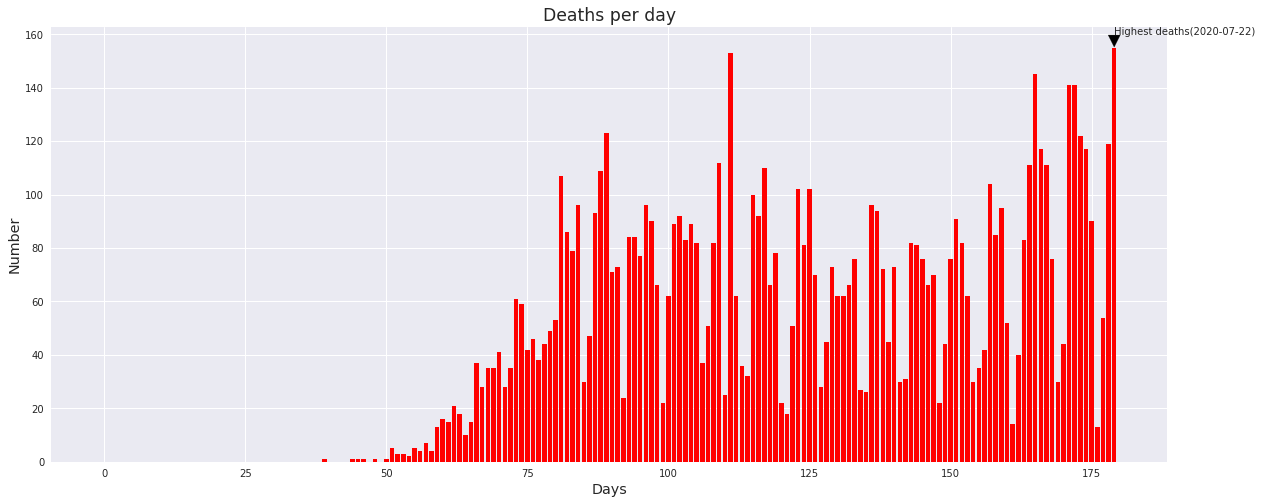

In [25]:
with plt.style.context('seaborn'):
  plt.figure(figsize = (20,8))
  plt.bar(x_variable2,california['Daily Deaths'],color = 'r')
  plt.xlabel('Days',fontsize = 'x-large')
  plt.ylabel('Number',fontsize = 'x-large')
  plt.title('Deaths per day',fontsize = 'xx-large')

  ymax2 = max(california['Daily Deaths'])
  xpos2 = int(california[california['Daily Deaths'] == ymax2].index[0])
  xmax2 = x_variable2[xpos2]
  #Used for calculating highest deaths
  
  plt.annotate('Highest deaths(%s)'%california.loc[xpos1,'date'], xy=(xmax2, ymax2), xytext=(xmax2, ymax2+5),arrowprops=dict(facecolor='black', shrink=0.05), )
print()
plt.show()

In [26]:
print('Confirmed cases:',california['cases'].iloc[-1])
print('Total deaths:',california['deaths'].iloc[-1])
print('Incident rate:',round(full_table['Incident_Rate'].iloc[4],2))
print('People tested:',int(full_table['People_Tested'].iloc[4]))
print('Testing rate:',round(full_table['Testing_Rate'].iloc[4],2))


Confirmed cases: 422528
Total deaths: 8038
Incident rate: 1066.22
People tested: 6664419
Testing rate: 16866.73


In [27]:
print('Further breaking data analysis into city level by taking San Francisco city.')
print('San Francisco is one of the busiest and popular city in California.')
print('Data is collected from SF OpenData')
print("SF OpenData is the City and County of San Francisco’s official open data portal and is a product of the official open data program, DataSF.")

Further breaking data analysis into city level by taking San Francisco city.
San Francisco is one of the busiest and popular city in California.
Data is collected from SF OpenData
SF OpenData is the City and County of San Francisco’s official open data portal and is a product of the official open data program, DataSF.


In [28]:
hospitals = pd.read_csv('Health_Care_Facilities.csv')
print('Total number of Healthcare facilities available:',len(hospitals))


Total number of Healthcare facilities available: 78


In [29]:

facility = list(hospitals['Facility Type'].unique())
number = []
for i in range(4):
    number.append(hospitals['Facility Type'].value_counts()[i])
fig5 = go.Figure(data=[go.Pie(labels=facility, values=number, pull=[0, 0, 0.2, 0])])
fig5.update_traces(hoverinfo='label+percent', textinfo='value')
fig5.update_layout(title_text='Hospitals')
fig5.show()

In [30]:
print('Given below is a graph of COVID-19 Cases Summarized by Race and Ethnicity')
print('Data is collected from data.gov')
print("data.gov is U.S. Government's open data website which provides data(federal, state, local, and tribal government) openly available to public.")
 

Given below is a graph of COVID-19 Cases Summarized by Race and Ethnicity
Data is collected from data.gov
data.gov is U.S. Government's open data website which provides data(federal, state, local, and tribal government) openly available to public.


In [31]:
race_df = pd.read_csv('Race and ethnicity.csv')
race_df['Race/Ethnicity'].replace({'Native Hawaiian or Other Pacific Islander': 'Native Hawaiian/Other Pacific Islander','Hispanic or Latino/a, all races':'Hispanic/Latino','Black or African American': 'Black/African American'},inplace = True)
races = list(race_df['Race/Ethnicity'].unique())
count = []

for ele in races:
    count.append(race_df.loc[race_df['Race/Ethnicity'] == ele, 'Cumulative Confirmed Cases'].max())
colors1=['firebrick', 'seagreen','darkorange','darkgrey','gold', 'darkorchid','slategrey','lawngreen','dodgerblue']

fig6 = go.Figure(data=[go.Bar(
    x=count,
    y=races,
    orientation = 'h',
    marker_color=colors1
)])

fig6.update_layout(title_text='Cases Summarized by Race and Ethnicity(San Francisco)')

In [32]:
print('Given below is an analysis on the basis of age group and gender.')
print('Data used below is the number of deaths exclusively due to Covid-19.')
print('Data collected from data.gov and provided by CDC(Centers for Disease Control and Prevention)')
print("The Centers for Disease Control and Prevention is a national public health institute in the United States")

Given below is an analysis on the basis of age group and gender.
Data used below is the number of deaths exclusively due to Covid-19.
Data collected from data.gov and provided by CDC(Centers for Disease Control and Prevention)
The Centers for Disease Control and Prevention is a national public health institute in the United States


In [33]:
deep_df = pd.read_csv('sex and age.csv')
deep_df.drop(deep_df[deep_df['State'] != 'United States'].index, inplace = True)

In [34]:
males = deep_df[deep_df['Sex'] == 'Male']
females = deep_df[deep_df['Sex'] == 'Female']
females[females['Age group'] == 'All ages']
print('Male deaths due to COVID-19:',int(males.loc[males['Age group'] == 'All ages','COVID-19 Deaths'].iloc[0]))
print('Female deaths due to COVID-19:',int(females.loc[females['Age group'] == 'All ages','COVID-19 Deaths'].iloc[0]))


Male deaths due to COVID-19: 69675
Female deaths due to COVID-19: 60570


In [35]:
males = deep_df[deep_df['Sex'] == 'Male']
males.drop(males[males['Age group'] == 'All ages'].index, inplace = True)
females = deep_df[deep_df['Sex'] == 'Female']
females.drop(females[females['Age group'] == 'All ages'].index, inplace = True)

In [36]:

mpercent = 100.*males['COVID-19 Deaths']/males['COVID-19 Deaths'].sum()
fpercent = 100.*females['COVID-19 Deaths']/females['COVID-19 Deaths'].sum()
mlabels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(males['Age group'] , mpercent)]
flabels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(females['Age group'] , fpercent)]

with plt.style.context('seaborn'):
  plt.figure(figsize=(18,10), dpi=1600)
  cmap = plt.get_cmap('jet')
  colors2 = cmap(np.linspace(0., 1., len(males['Age group'])))
  pie1 = plt.subplot2grid((2,2),(0,0))
  plt.pie(males['COVID-19 Deaths'],startangle = 90,colors = colors2)
  plt.legend(mlabels,loc = 'best',bbox_to_anchor=(1, 0, 0.5, 1))
  plt.title('Males',fontsize = 'x-large')

  pie2 = plt.subplot2grid((2,2), (0, 1))
  plt.pie(females['COVID-19 Deaths'],startangle = 90,colors = colors2)
  plt.legend(flabels,loc = 'best',bbox_to_anchor=(1, 0, 0.5, 1))
  plt.title('Females',fontsize = 'x-large')
  plt.suptitle('Gender/Age Variation')
plt.show()

In [37]:
df = pd.read_csv('choro.csv',delimiter=',')
nofips = [80001, 88888, 99999, 66, 69, 78,80013, 80015, 80017, 80022, 80026, 80040, 72888, 80047, 90001, 90002, 90004, 90005, 90006, 90009, 90010, 90012, 90013, 90015, 90016, 90017, 90018, 90019, 90020, 90021, 90022, 90023, 90024, 90025, 90026, 90027, 90028, 90029, 90030, 90031, 90032, 90033, 90034, 90035, 90036, 90037, 90038, 90039, 90040, 90041, 90042, 72999, 90044, 90045, 90046, 90047, 90048, 90049, 90050, 90051, 90053, 90054, 90055, 90056]
df = df[~df['FIPS'].isin(nofips)]

df = df[df['FIPS'].notna()]
temp = df['FIPS'].tolist()
temp = [round(x) for x in temp]

hover = df['Province_State'].tolist()

fips = []
for x in temp:
  variable = str(x).zfill(5)
  fips.append(variable)
values1 = df['Confirmed'].tolist()



In [38]:
print('Given below is choropleth map of United States taking Confirmed and Death counts as values.')

Given below is choropleth map of United States taking Confirmed and Death counts as values.


In [39]:
colorscale1 = px.colors.sequential.Darkmint
endpts1 = list(np.linspace(100, 10000, len(colorscale1) - 3))

map3 = ff.create_choropleth(
    fips=fips, values=values1,
    mapbox_style="carto-positron",
    binning_endpoints=endpts1,
    colorscale=colorscale1,
    show_state_data=True,
    scope = ['usa'],
    
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Confirmed Location wise',
    legend_title='Confirmed'
)

map3.layout.template = 'plotly_dark'
map3.update_traces(marker_color=None)
map3.update_xaxes(showticklabels=False)
map3.update_yaxes(showticklabels=False)
map3.show()


In [40]:
colorscale2 = px.colors.sequential.Reds
endpts2 = list(np.linspace(100, 1000, 4))

values2 = df['Deaths'].tolist()
map4 = ff.create_choropleth(
    fips=fips, values=values2,
    mapbox_style="carto-positron",
    binning_endpoints=endpts2,
    colorscale=colorscale2[3:8],
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Deaths location wise',
    legend_title='Deaths'
)

map4.layout.template = 'plotly_dark'
map4.update_xaxes(showticklabels=False)
map4.update_yaxes(showticklabels=False)
map4.show()

In [41]:
print('Now user can input a state.')
print('Data corresponding to the state will be shown and visualized based on data gathered from Johns Hopkins University.')

Now user can input a state.
Data corresponding to the state will be shown and visualized based on data gathered from Johns Hopkins University.


In [42]:
state = input('Enter state:')
if state.title() not in list(full_table['State'].unique()):
  print('No such state')
user_df1 = full_table[full_table['State'] == state.title()]
user_df2 = nyt_df[nyt_df['state'] == state.title()]
user_df2['Daily cases'] = user_df2['cases'].diff().fillna(user_df2['cases'])
user_df2['Daily deaths'] = user_df2['deaths'].diff().fillna(user_df2['deaths'])

user_df2.drop(user_df2[user_df2['Daily cases'] < 0].index,inplace = True)
user_df2.drop(user_df2[user_df2['Daily deaths'] < 0].index,inplace = True)
#Removing wrong data

Enter state:washington


In [43]:
print('Number of cases reported:',user_df2['cases'].iloc[-1])
print('Number of deaths reported:',user_df2['deaths'].iloc[-1])
if user_df1['Recovered'].isnull().any():
  print('Recovery cases not available')
else:
  print('Number of recovered cases:',int(user_df1['Recovered'].iloc[0]))



Number of cases reported: 51442
Number of deaths reported: 1534
Recovery cases not available


In [44]:
print('Incident rate:',round(user_df1['Incident_Rate'].iloc[0],2))
print('People tested:',int(user_df1['People_Tested'].iloc[0]))
print('Testing rate:',round(user_df1['Testing_Rate'].iloc[0],2))

if user_df1['People_Hospitalized'].isnull().any():
  print('Hospitalization details not available')
else:
  print('People hospitalized:',int(user_df1['People_Hospitalized'].iloc[0]))

if user_df1['People_Hospitalized'].isnull().any():
  print('Hospitalization rate not available')
else:
  print('Hospitalization rate:',round(user_df1['Hospitalization_Rate'].iloc[0],2))



Incident rate: 646.72
People tested: 841184
Testing rate: 11046.56
People hospitalized: 5161
Hospitalization rate: 10.48


In [45]:
fig7 = px.bar(user_df2, x="date", y="Daily cases")

layout = go.Layout(
    title=go.layout.Title(
        text="Daily cases in %s"%state.title(),
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date",
    yaxis_title = "Number of cases"
)

fig7.update_layout(layout)
fig7.layout.template = 'plotly_dark'
fig7.show()

In [46]:
fig8 = px.bar(user_df2, x="date", y="Daily deaths")

layouts = go.Layout(
    title=go.layout.Title(
        text="Daily deaths in %s"%state.title(),
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
    xaxis_title = "Date",
    yaxis_title = "Number of deaths"
)

fig8.update_layout(layouts)
fig8.update_traces(marker_color='red')
fig8.layout.template = 'plotly_dark'
fig8.show()

In [70]:
print('Data Resources')
print('--------------')
print()
print('Ongoing repository of data on GitHub by New York Times and Johns Hopkins University & Medicine')
print('DataSF, City and County of San Francisco’s official open data program')
print('data.gov, Open database maintained by Government of United States')
print('Harvard global health institute')
print('Centers for Disease Control and Prevention')

Data Resources
--------------

Ongoing repository of data on GitHub by New York Times and Johns Hopkins University & Medicine
DataSF, City and County of San Francisco’s official open data program
data.gov, Open database maintained by Government of United States
Harvard global health institute
Centers for Disease Control and Prevention
